## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
data_df['Mouse ID'].nunique()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_df = data_df[data_df.duplicated(['Mouse ID'])]
duplicated_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 



In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df.drop_duplicates(subset="Mouse ID", keep="last")
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_tumor_vol = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_vol = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor_vol = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumor_vol = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor_vol = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol,
                              "Median Tumor Volume": median_tumor_vol,
                              "Variance Tumor Volume": var_tumor_vol,
                              "STD Tumor Volume" :std_tumor_vol, 
                              "SEM Tumor Volume" :sem_tumor_vol})
            
                                
summary_df.head()

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,STD Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
DR_df = pd.DataFrame(pd.value_counts(data_df["Drug Regimen"]))
DR_df

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Ceftamin,178
Infubinol,178
Propriva,161


## Bar and Pie Charts

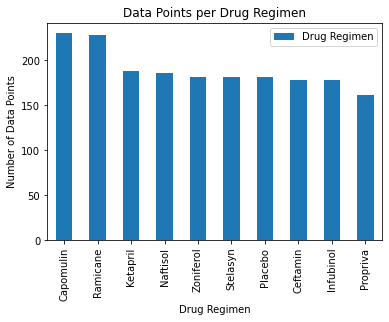

<Figure size 432x288 with 0 Axes>

In [12]:
DR_df.plot(kind="bar")
plt.title("Data Points per Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

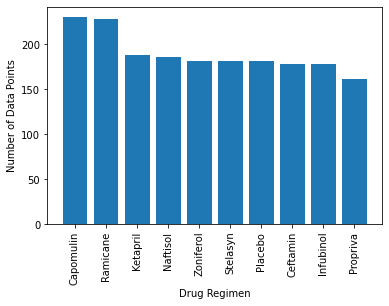

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = data_df["Drug Regimen"].value_counts().index
y_axis = data_df["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = pd.value_counts(clean_df['Sex'])
sex_count

Male      125
Female    124
Name: Sex, dtype: int64

Text(0, 0.5, 'Sex')

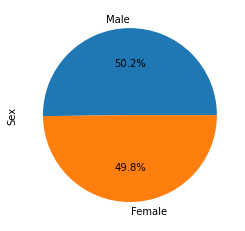

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = sex_count.plot(kind="pie", y="sex", autopct='%1.1f%%')
sex_count.set_ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
Capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
Ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
Infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
Ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [23]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

x_axisCa = Capomulin["Tumor Volume (mm3)"]
x_axisR = Ramicane["Tumor Volume (mm3)"]
x_axisI = Infubinol["Tumor Volume (mm3)"]
x_axisCe = Ceftamin["Tumor Volume (mm3)"]

quartiles_Ca = x_axisCa.quantile([.25,.5,.75])
lowerq_Ca = quartiles_Ca[0.25]
upperq_Ca = quartiles_Ca[0.75]
iqr_Ca = upperq_Ca-lowerq_Ca
lower_bound_Ca = lowerq_Ca - (1.5*iqr_Ca)
upper_bound_Ca = upperq_Ca + (1.5*iqr_Ca)
print("Drug: Capomulin")
print(quartiles_Ca)
print(lowerq_Ca)
print(upperq_Ca)
print(iqr_Ca)
print(f"Any Value under {lower_bound_Ca} is a possible outlier.")
print(f"Any Value above {upper_bound_Ca} is a possible outlier.")

quartiles_R = x_axisR.quantile([.25,.5,.75])
lowerq_R = quartiles_R[0.25]
upperq_R = quartiles_R[0.75]
iqr_R = upperq_R-lowerq_R
lower_bound_R = lowerq_R - (1.5*iqr_R)
upper_bound_R = upperq_R + (1.5*iqr_R)
print("Drug: Ramicane")
print(quartiles_R)
print(lowerq_R)
print(upperq_R)
print(iqr_R)
print(f"Any Value under {lower_bound_R} is a possible outlier.")
print(f"Any Value above {upper_bound_R} is a possible outlier.")

quartiles_I = x_axisI.quantile([.25,.5,.75])
lowerq_I = quartiles_I[0.25]
upperq_I = quartiles_I[0.75]
iqr_I = upperq_I-lowerq_I
lower_bound_I = lowerq_I - (1.5*iqr_I)
upper_bound_I = upperq_I + (1.5*iqr_I)
print("Drug: Infubinol")
print(quartiles_I)
print(lowerq_I)
print(upperq_I)
print(iqr_I)
print(f"Any Value under {lower_bound_I} is a possible outlier.")
print(f"Any Value above {upper_bound_I} is a possible outlier.")

quartiles_Ce = x_axisCe.quantile([.25,.5,.75])
lowerq_Ce = quartiles_Ce[0.25]
upperq_Ce = quartiles_Ce[0.75]
iqr_Ce = upperq_Ce-lowerq_Ce
lower_bound_Ce = lowerq_Ce - (1.5*iqr_Ce)
upper_bound_Ce = upperq_Ce + (1.5*iqr_Ce)
print("Drug: Ceftamin")
print(quartiles_Ce)
print(lowerq_Ce)
print(upperq_Ce)
print(iqr_Ce)
print(f"Any Value under {lower_bound_Ce} is a possible outlier.")
print(f"Any Value above {upper_bound_Ce} is a possible outlier.")

Drug: Capomulin
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
32.37735684
40.1592203
7.781863460000004
Any Value under 20.70456164999999 is a possible outlier.
Any Value above 51.83201549 is a possible outlier.
Drug: Ramicane
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
31.56046955
40.65900627
9.098536719999998
Any Value under 17.912664470000003 is a possible outlier.
Any Value above 54.30681135 is a possible outlier.
Drug: Infubinol
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
54.04860769
65.52574285
11.477135160000003
Any Value under 36.83290494999999 is a possible outlier.
Any Value above 82.74144559000001 is a possible outlier.
Drug: Ceftamin
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
48.72207785
64.29983003
15.577752179999997
Any Value under 25.355449580000002 is a possible outlier.


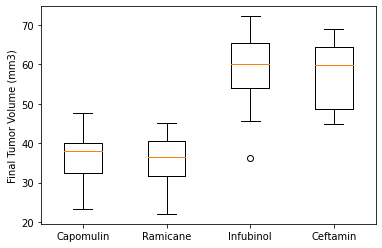

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot([x_axisCa, x_axisR, x_axisI, x_axisCe])
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

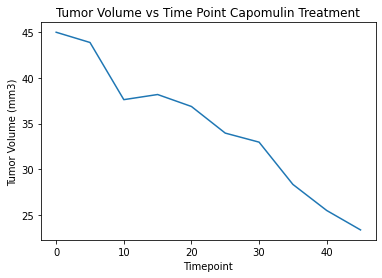

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = data_df.loc[data_df["Mouse ID"] == "s185"]
x_axis = x_axis["Timepoint"]
y_axis = data_df.loc[data_df["Mouse ID"] == "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume vs Time Point Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_vs_weight = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
tumor_vs_weight

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,Capomulin,Female,23,20,45,37.311846,2


Text(0, 0.5, 'Tumor Volume (mm3)')

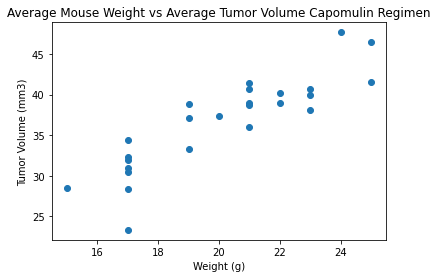

In [25]:
mouse_weight = tumor_vs_weight["Weight (g)"]
tumor_volume = tumor_vs_weight["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, tumor_volume)
plt.title("Average Mouse Weight vs Average Tumor Volume Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation between both weight and tumor volume is 0.88


Text(0, 0.5, 'Tumor Volume (mm3)')

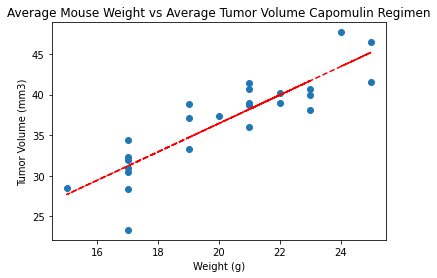

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation between both weight and tumor volume is {round(correlation[0],2)}")

slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
fit = slope * mouse_weight + int
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, fit, "--", color="r")
plt.title("Average Mouse Weight vs Average Tumor Volume Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")